In [2]:
# 单元格1: 导入和设置
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入新模块
from funnel_analyzer import funnel_analyzer
from retention_analyzer import retention_analyzer
from value_analyzer import value_analyzer
from config import PROCESSED_DATA_PATH

print("===  用户行为深度分析 ===")
print("开始深度用户行为洞察...")

===  用户行为深度分析 ===
开始深度用户行为洞察...


In [3]:
# 单元格2: 加载清洗后的数据
print("步骤1: 加载数据")
df = pd.read_csv(PROCESSED_DATA_PATH, parse_dates=['datetime'])
df['date'] = pd.to_datetime(df['date'])

print(f"数据加载完成: {len(df):,} 条记录")
print(f"时间范围: {df['datetime'].min()} 到 {df['datetime'].max()}")

步骤1: 加载数据
数据加载完成: 499,997 条记录
时间范围: 2014-01-02 03:52:18 到 2025-11-02 20:41:46


步骤2: 转化漏斗分析
===用户漏斗转化分析===
转化漏斗数据：
   步骤     用户数     转化率  步骤转化率
0  浏览  318585  100.00   0.00
1  加购   26579    8.34   8.34
2  收藏   13677    4.29  51.46
3  购买    9995    3.14  73.08

===分析漏斗流失点
关键流失点分析:
  从步骤 到步骤                                              流失用户数    流失率
0  浏览  加购  {1, 4, 5, 7, 14, 15, 19, 21, 27, 29, 32, 41, 4...  96.34
1  加购  收藏  {655365, 655369, 393229, 786450, 524312, 65538...  98.53
2  收藏  购买  {196608, 163840, 524289, 655363, 884740, 39322...  98.82
生成转化漏斗图标
✅ 漏斗图表已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\conversion_funnel.png


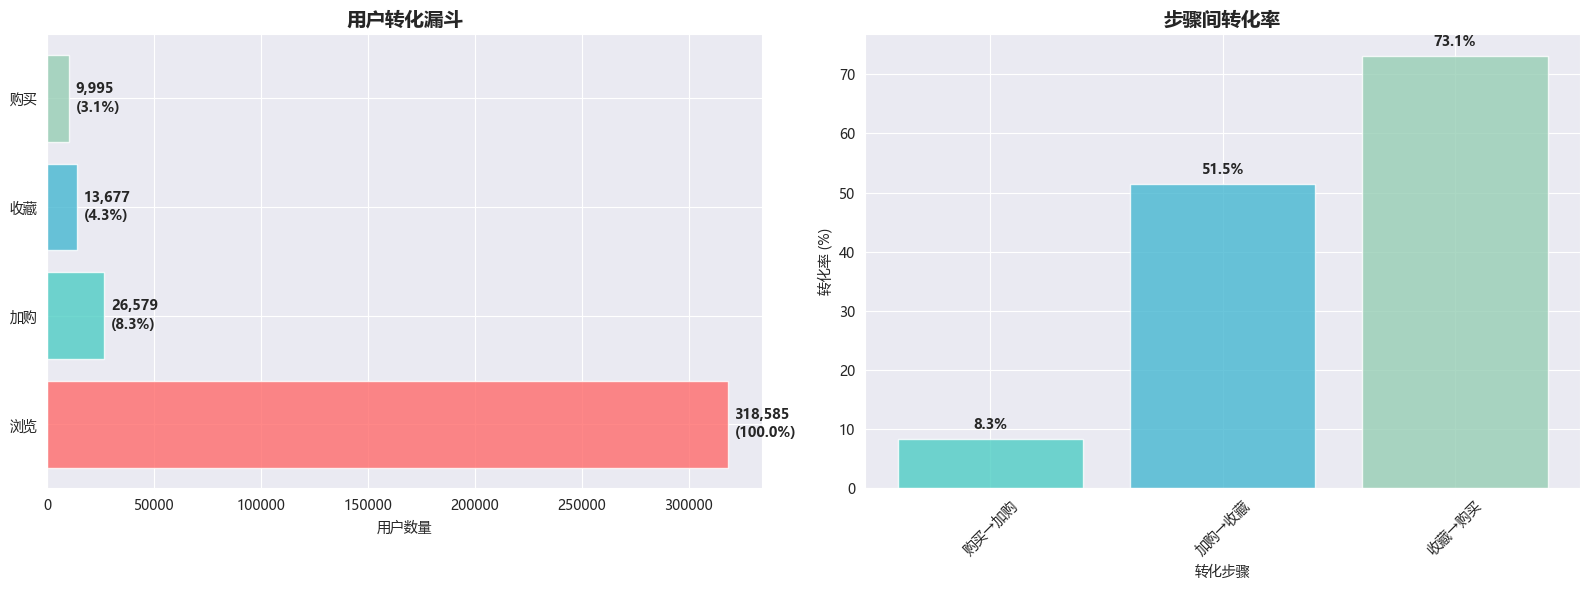

✅ 转化漏斗分析完成


In [4]:
# 单元格3: 转化漏斗分析
print("步骤2: 转化漏斗分析")

# 分析转化漏斗
funnel_df = funnel_analyzer.analyze_conversion_funnel(df)

# 分析流失点
dropoff_df = funnel_analyzer.analyze_funnel_dropoff(df, funnel_df)

# 可视化
funnel_fig = funnel_analyzer.create_funnel_visualization(funnel_df)

print("✅ 转化漏斗分析完成")

步骤3: 用户留存分析
=== 用户留存分析 ===
计算同期群留存...
同期群留存矩阵（前5行）:
days_since_first       0     1     2     3     4     5     6     7     8     \
cohort_week                                                                   
2013-12-30/2014-01-05   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-03/2016-10-09   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-10/2017-04-16   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-07/2017-08-13   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-21/2017-08-27   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

days_since_first       9     ...  28    34    52    231   232   234   1428  \
cohort_week                  ...                                             
2013-12-30/2014-01-05   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   1.0   
2016-10-03/2016-10-09   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-10/2017-04-16   NaN  ...   NaN   NaN   NaN   1.0   1.0   1.0   NaN   
2017

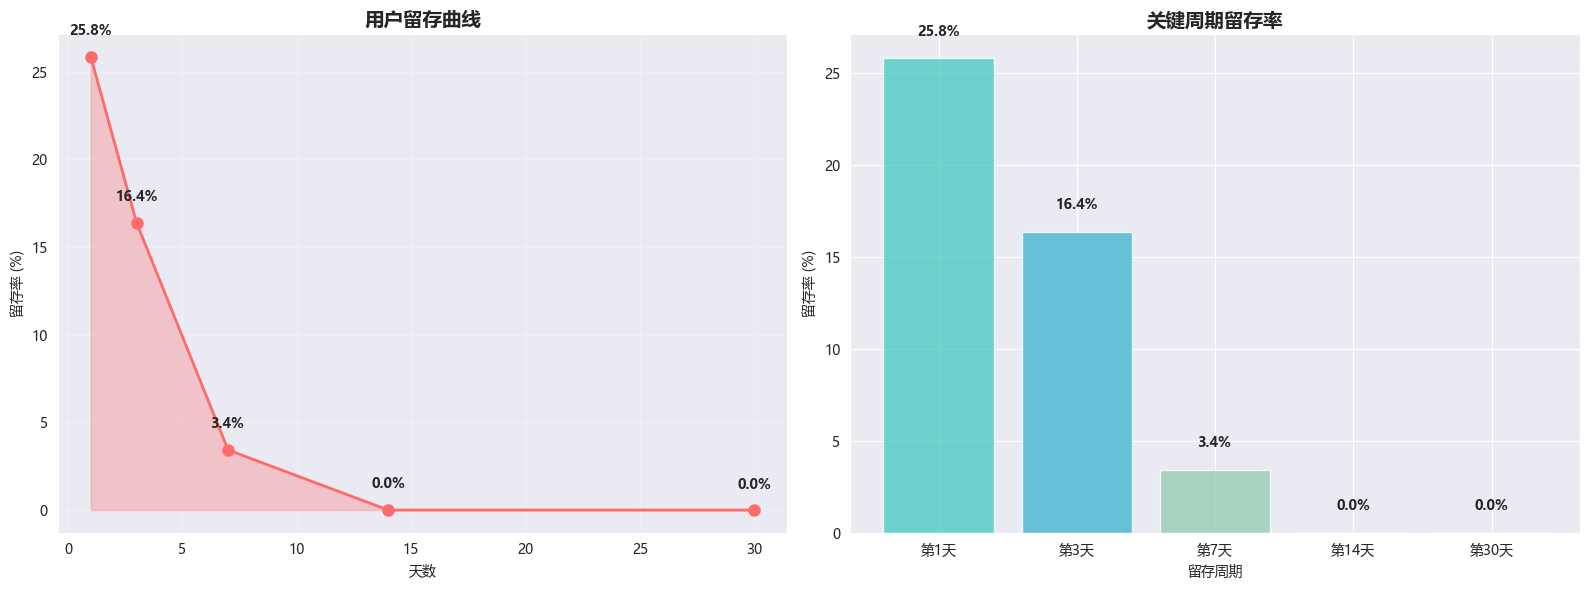

✅ 用户留存分析完成


In [5]:
print("步骤3: 用户留存分析")

# 计算用户留存
retention_results = retention_analyzer.calculate_user_retention(df)

# 可视化留存分析
retention_fig = retention_analyzer.create_retention_visualization(retention_results)

print("✅ 用户留存分析完成")

In [ ]:
print("步骤4: RFM用户价值分析")

# 计算RFM分数
user_rfm = value_analyzer.calculate_rfm_scores(df)

# 用户分层
user_rfm_with_scores, segment_counts = value_analyzer.assign_rfm_scores(user_rfm)

# 分析分段行为
segment_behavior = value_analyzer.analyze_segment_behavior(df, user_rfm_with_scores)

# 可视化RFM分析
rfm_fig = value_analyzer.create_rfm_visualization(user_rfm_with_scores, segment_counts)

print("✅ RFM用户价值分析完成")

In [ ]:
print("步骤5: 生成深度分析报告")

# 获取关键指标
total_users = df['user_id'].nunique()
overall_conversion = funnel_df.loc[funnel_df['步骤'] == '购买', '转化率'].iloc[0]
avg_retention = np.mean(list(retention_results['overall_retention'].values()))
high_value_users = segment_counts.get('重要价值客户', 0) + segment_counts.get('重要发展客户', 0)

report_content = f"""
# 电商用户行为深度分析报告

## 核心发现

### 1. 用户转化表现
- 总体购买转化率: {overall_conversion:.2f}%
- 关键流失点: {dropoff_df.loc[dropoff_df['流失率'].idxmax(), '从步骤']}→{dropoff_df.loc[dropoff_df['流失率'].idxmax(), '到步骤']} (流失率: {dropoff_df['流失率'].max():.1f}%)

### 2. 用户留存情况
- 平均留存率: {avg_retention:.1f}%
- 最佳留存周期: 第{max(retention_results['overall_retention'].items(), key=lambda x: x[1])[0].replace('第', '').replace('天留存率', '')}天 ({max(retention_results['overall_retention'].values()):.1f}%)

### 3. 用户价值分布
- 高价值用户占比: {high_value_users/total_users*100:.1f}%
- 核心用户群体: {segment_counts.index[0]} ({segment_counts.iloc[0]/total_users*100:.1f}%)

## 业务建议

### 转化优化
1. **针对{dropoff_df.loc[dropoff_df['流失率'].idxmax(), '从步骤']}→{dropoff_df.loc[dropoff_df['流失率'].idxmax(), '到步骤']}流失**: 设计精准营销活动，如购物车提醒、收藏商品专属优惠

### 留存提升
2. **新用户引导**: 优化新用户首日体验，提高次日留存率
3. **活跃用户维护**: 针对{retention_results['overall_retention']['第7天留存率']:.1f}%的7日留存用户设计专属权益

### 价值挖掘
4. **高价值用户维护**: 为重点客户提供VIP服务和个性化推荐
5. **潜力用户转化**: 对重要发展客户进行精准营销，提升其消费频次

## 技术洞察
- 分析数据量: {len(df):,} 条行为记录
- 覆盖用户: {total_users:,} 人
- 分析方法: 转化漏斗 + 留存分析 + RFM分层
- 分析深度: 用户全生命周期价值评估
"""

report_path = PROCESSED_DATA_PATH.parent.parent / "reports" / "analysis_reports" / "用户行为深度分析报告.md"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)

print(f"✅ 深度分析报告已生成: {report_path}")